In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
spine= pd.read_csv("G:/IMS/Dataset_spine.csv")

In [3]:
spine.head() 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


In [4]:
spine.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [5]:
spine.shape

(310, 12)

In [6]:
spine.columns.tolist()

[' pelvic_incidence  ',
 ' pelvic_tilt ',
 ' lumbar_lordosis_angle ',
 ' sacral_slope ',
 ' pelvic_radius ',
 ' degree_spondylolisthesis ',
 ' pelvic_slope',
 ' Direct_tilt',
 ' thoracic_slope',
 ' cervical_tilt',
 'sacrum_angle',
 ' scoliosis_slope']

In [7]:
spine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 12 columns):
 pelvic_incidence             310 non-null float64
 pelvic_tilt                  310 non-null float64
 lumbar_lordosis_angle        310 non-null float64
 sacral_slope                 310 non-null float64
 pelvic_radius                310 non-null float64
 degree_spondylolisthesis     310 non-null float64
 pelvic_slope                 310 non-null float64
 Direct_tilt                  310 non-null float64
 thoracic_slope               310 non-null float64
 cervical_tilt                310 non-null float64
sacrum_angle                  310 non-null float64
 scoliosis_slope              310 non-null float64
dtypes: float64(12)
memory usage: 29.2 KB


In [8]:
spine.nunique()

 pelvic_incidence             310
 pelvic_tilt                  310
 lumbar_lordosis_angle        280
 sacral_slope                 281
 pelvic_radius                310
 degree_spondylolisthesis     310
 pelvic_slope                 310
 Direct_tilt                  310
 thoracic_slope               310
 cervical_tilt                310
sacrum_angle                  310
 scoliosis_slope              310
dtype: int64

In [9]:
spine.isnull().sum()

 pelvic_incidence             0
 pelvic_tilt                  0
 lumbar_lordosis_angle        0
 sacral_slope                 0
 pelvic_radius                0
 degree_spondylolisthesis     0
 pelvic_slope                 0
 Direct_tilt                  0
 thoracic_slope               0
 cervical_tilt                0
sacrum_angle                  0
 scoliosis_slope              0
dtype: int64

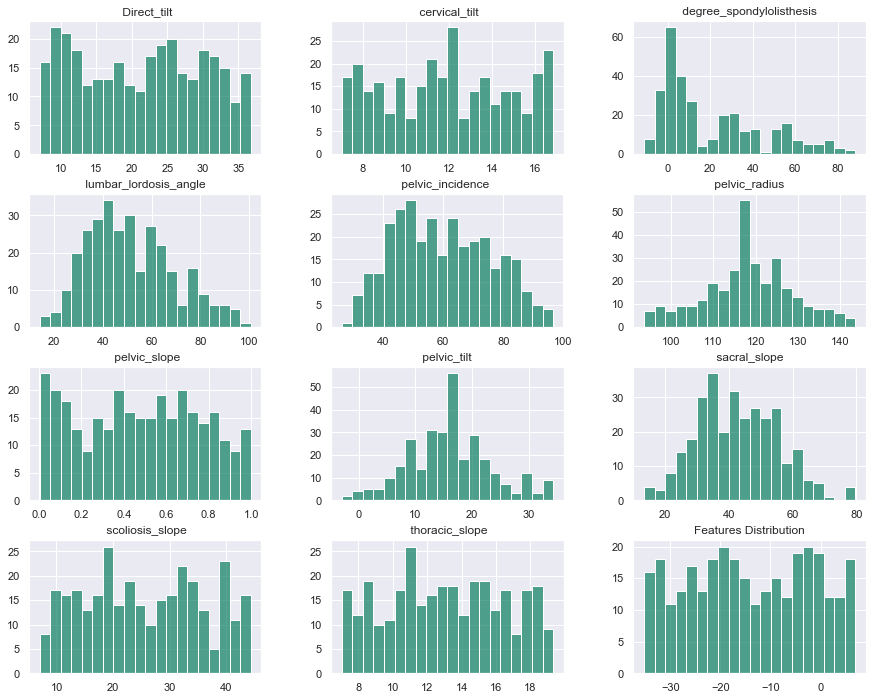

<Figure size 432x288 with 0 Axes>

In [55]:
spine.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()
plt.savefig('histogram.png')

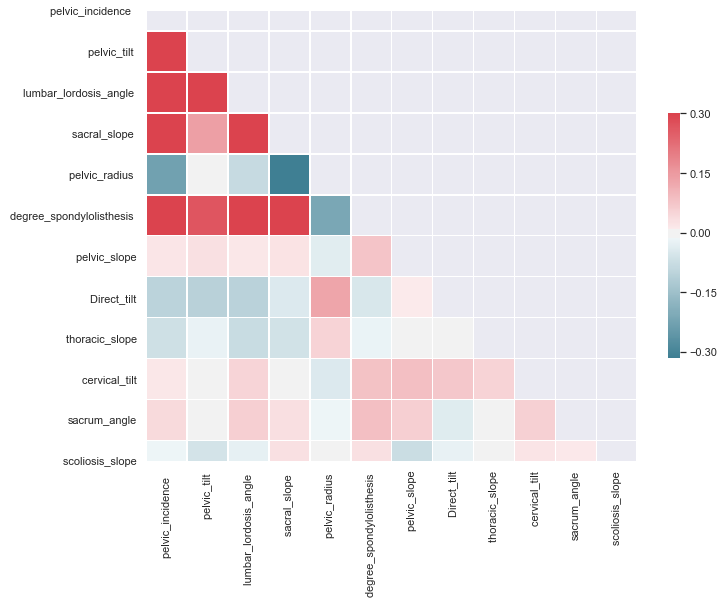

In [49]:
# Let us get the correlation in the data

# Compute the correlation matrix
corr = spine.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('correlation matrix.png')

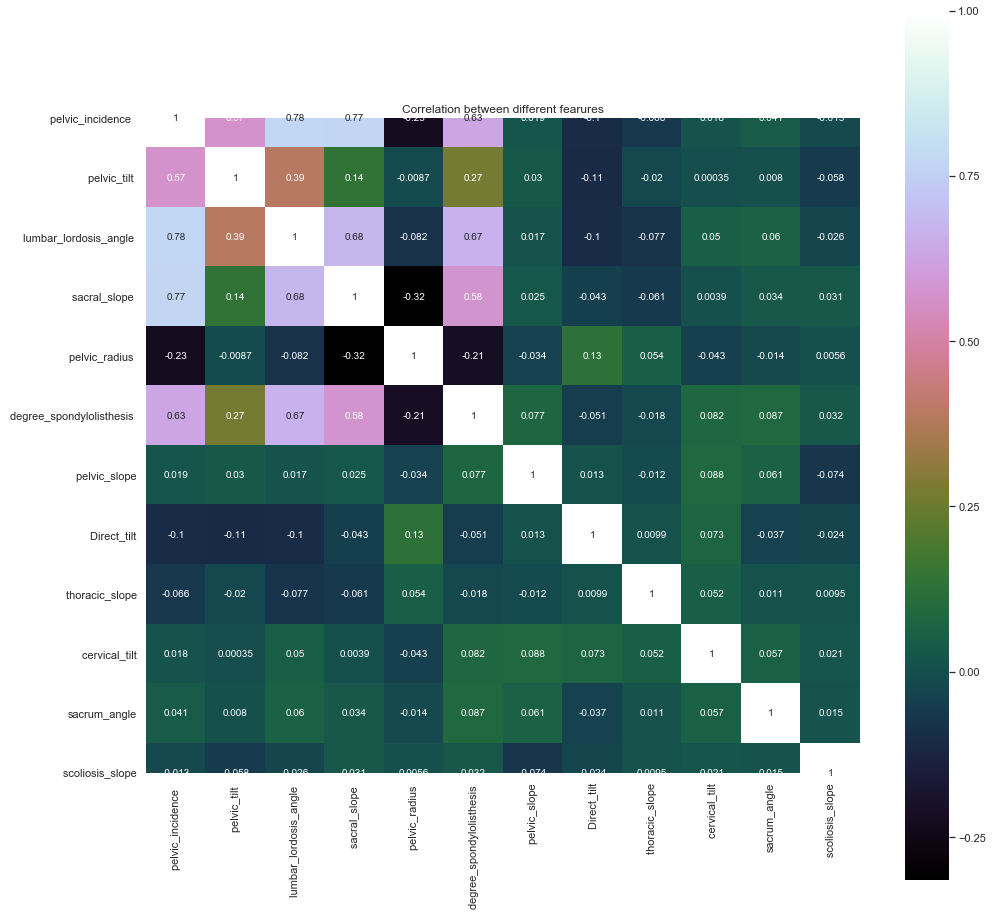

In [57]:
correlation = spine.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.savefig('corr.png')

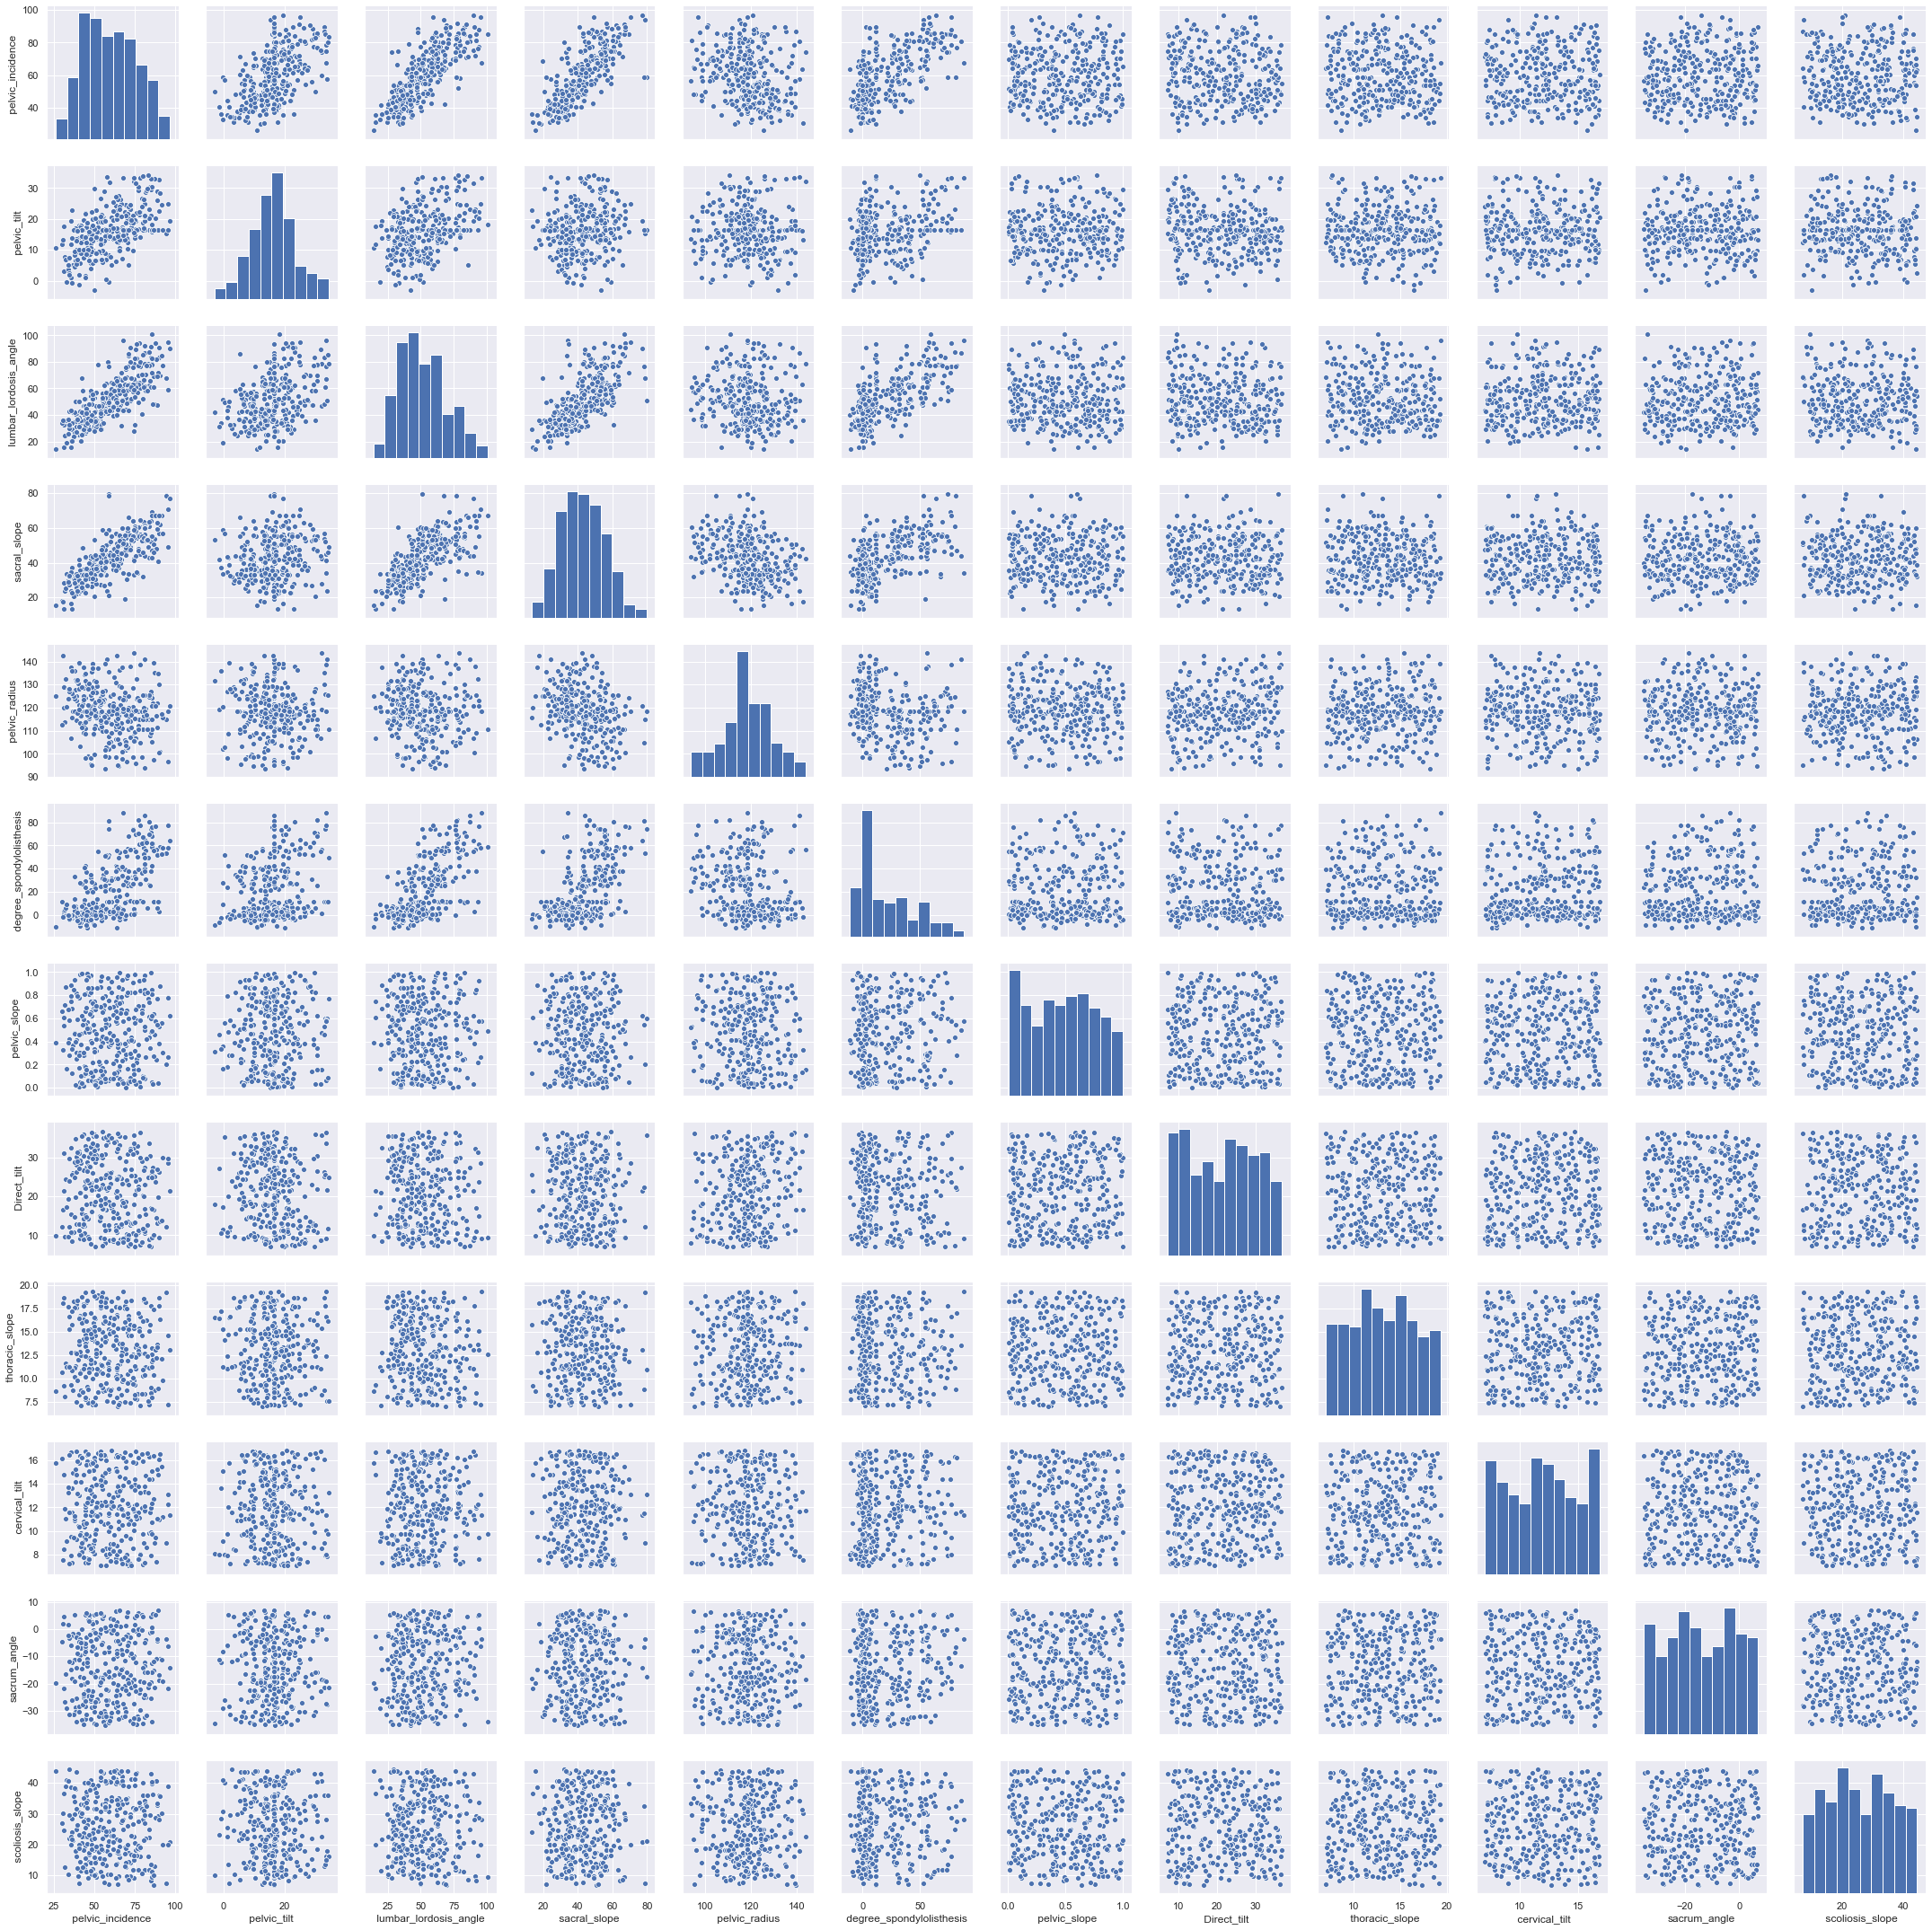

In [50]:
sns.pairplot(spine)
plt.savefig('pairplot.png')

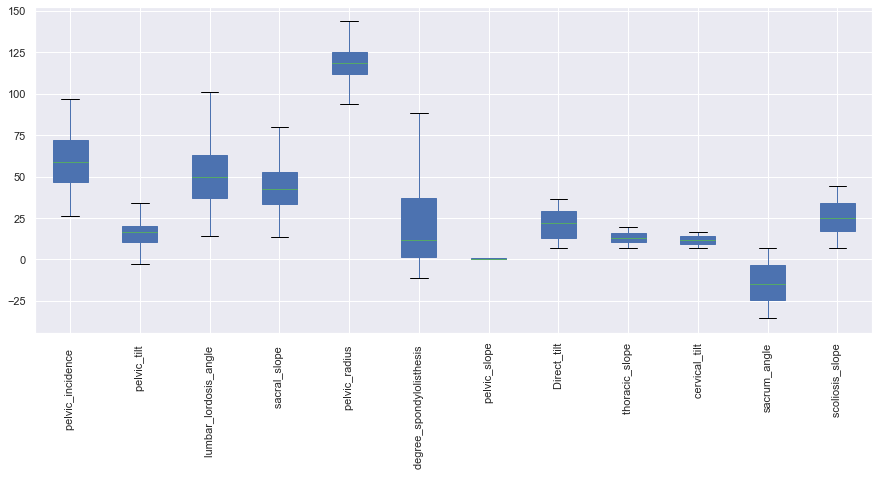

In [48]:
plt.subplots(figsize=(15,6))
spine.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.savefig('foo.png')

In [15]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [16]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median
    
X = spine.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

C:\Users\Harshita Chibber\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Harshita Chibber\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Harshita Chibber\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
X = spine.iloc[:, :]

In [18]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

 pelvic_tilt  Contains Outlier
 pelvic_radius  Contains Outlier
 degree_spondylolisthesis  Contains Outlier


In [19]:
for i in range (3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

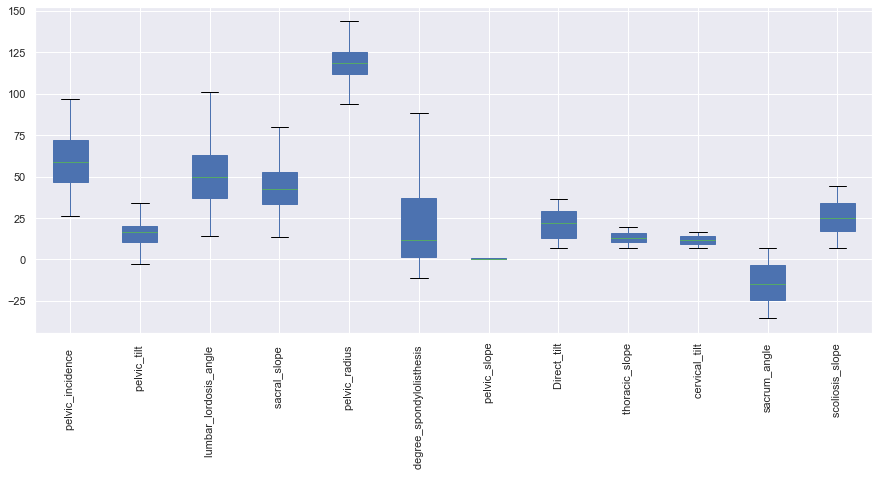

In [20]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 12 columns):
 pelvic_incidence             310 non-null float64
 pelvic_tilt                  310 non-null float64
 lumbar_lordosis_angle        310 non-null float64
 sacral_slope                 310 non-null float64
 pelvic_radius                310 non-null float64
 degree_spondylolisthesis     310 non-null float64
 pelvic_slope                 310 non-null float64
 Direct_tilt                  310 non-null float64
 thoracic_slope               310 non-null float64
 cervical_tilt                310 non-null float64
sacrum_angle                  310 non-null float64
 scoliosis_slope              310 non-null float64
dtypes: float64(12)
memory usage: 29.2 KB


In [22]:
X.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.890753,16.088687,51.685188,42.698913,118.350879,21.053409,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,16.140170,7.398122,18.071507,12.656430,10.515059,24.246604,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-2.970024,14.000000,13.366931,93.692209,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.839352,37.000000,33.347122,111.974906,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.645283,16.357689,49.455830,42.389253,118.268178,11.501312,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.313279,20.338937,62.964777,52.475365,125.127803,37.277675,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,96.657315,34.310989,100.744220,79.695154,143.560690,88.301486,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [23]:
spine_std = StandardScaler().fit_transform(X)

In [24]:
mean_vec = np.mean(spine_std, axis=0)
cov_mat = (spine_std - mean_vec).T.dot((spine_std - mean_vec)) / (spine_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00323625e+00  5.71665852e-01  7.77594039e-01  7.71828737e-01
  -2.27969206e-01  6.33599359e-01  1.88854482e-02 -1.00957028e-01
  -6.63068101e-02  1.76411388e-02  4.07181672e-02 -1.28459915e-02]
 [ 5.71665852e-01  1.00323625e+00  3.94385639e-01  1.41576875e-01
  -8.72861787e-03  2.68172060e-01  2.99599620e-02 -1.05501253e-01
  -2.01281167e-02  3.50229611e-04  7.99712801e-03 -5.85019080e-02]
 [ 7.77594039e-01  3.94385639e-01  1.00323625e+00  6.80862410e-01
  -8.26072934e-02  6.72959187e-01  1.70333980e-02 -1.02604521e-01
  -7.70598287e-02  5.01541649e-02  6.04739004e-02 -2.63897144e-02]
 [ 7.71828737e-01  1.41576875e-01  6.80862410e-01  1.00323625e+00
  -3.16618440e-01  5.80391030e-01  2.46552838e-02 -4.35180456e-02
  -6.09107516e-02  3.91214345e-03  3.36301179e-02  3.13313030e-02]
 [-2.27969206e-01 -8.72861787e-03 -8.26072934e-02 -3.16618440e-01
   1.00323625e+00 -2.14954970e-01 -3.44664362e-02  1.30547222e-01
   5.41152595e-02 -4.27825878e-02 -1.37758574e-02  5.

In [25]:
print('NumPy covariance matrix: \n%s' %np.cov(spine_std.T))

NumPy covariance matrix: 
[[ 1.00323625e+00  5.71665852e-01  7.77594039e-01  7.71828737e-01
  -2.27969206e-01  6.33599359e-01  1.88854482e-02 -1.00957028e-01
  -6.63068101e-02  1.76411388e-02  4.07181672e-02 -1.28459915e-02]
 [ 5.71665852e-01  1.00323625e+00  3.94385639e-01  1.41576875e-01
  -8.72861787e-03  2.68172060e-01  2.99599620e-02 -1.05501253e-01
  -2.01281167e-02  3.50229611e-04  7.99712801e-03 -5.85019080e-02]
 [ 7.77594039e-01  3.94385639e-01  1.00323625e+00  6.80862410e-01
  -8.26072934e-02  6.72959187e-01  1.70333980e-02 -1.02604521e-01
  -7.70598287e-02  5.01541649e-02  6.04739004e-02 -2.63897144e-02]
 [ 7.71828737e-01  1.41576875e-01  6.80862410e-01  1.00323625e+00
  -3.16618440e-01  5.80391030e-01  2.46552838e-02 -4.35180456e-02
  -6.09107516e-02  3.91214345e-03  3.36301179e-02  3.13313030e-02]
 [-2.27969206e-01 -8.72861787e-03 -8.26072934e-02 -3.16618440e-01
   1.00323625e+00 -2.14954970e-01 -3.44664362e-02  1.30547222e-01
   5.41152595e-02 -4.27825878e-02 -1.37758574e

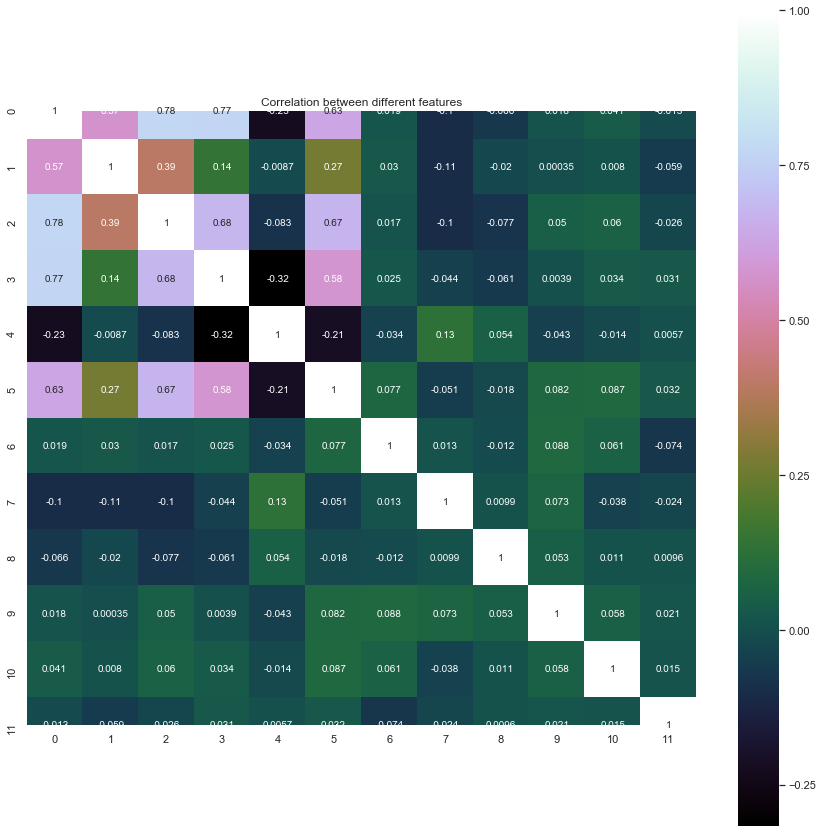

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')
plt.savefig('correlation bw features.png')

In [27]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.50802295  0.77351499 -0.20270735  0.27394683  0.10104212  0.06929089
   0.1036003   0.00627664 -0.01710512 -0.00992401  0.03560667  0.00283867]
 [ 0.28215414 -0.35687866 -0.08588209 -0.02824767  0.57574847  0.15215314
   0.48309971  0.12423085 -0.31666094  0.01468872 -0.07186996  0.27521316]
 [ 0.47750175 -0.092128    0.81841692  0.01222643 -0.25032639  0.0185006
   0.12803494 -0.00243636  0.02980745  0.07053929  0.09060978 -0.00836045]
 [ 0.45059469 -0.51351752 -0.3619426   0.49265586 -0.1713455  -0.0081743
  -0.20280242 -0.10519391  0.18248217 -0.04645932  0.0765251  -0.19135557]
 [-0.17232762 -0.00764344 -0.22040926  0.09290799 -0.52460195  0.05380392
   0.62306681 -0.13684434 -0.05691814  0.33478261  0.30523538  0.13965757]
 [ 0.4335206  -0.03996478 -0.2995272  -0.80829742 -0.16484272 -0.12510134
  -0.04848933 -0.08370277  0.06532474  0.00305015  0.09856518 -0.03505547]
 [ 0.03445412  0.01592603  0.03116633  0.06958718 -0.00872723 -0.51738808
   0.10329514 -0.642

In [28]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.3832351935916263
1.177002380565475
1.1247875308974582
1.0731624629895875
1.0383153061016597
0.9744020922082253
0.9105411146785651
0.8686858544435843
0.7239578891507754
0.4353419429426945
0.2271490458176812
0.10225413806897596


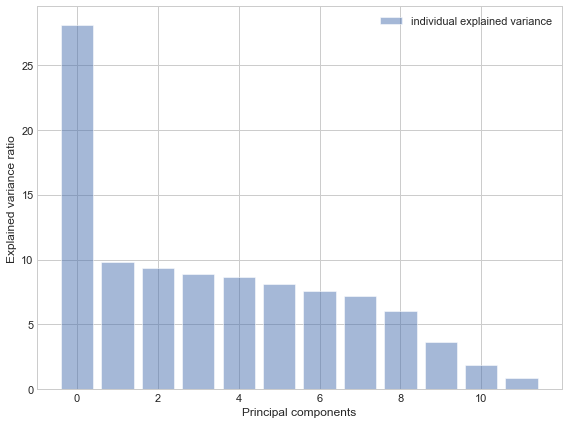

In [29]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(12), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    

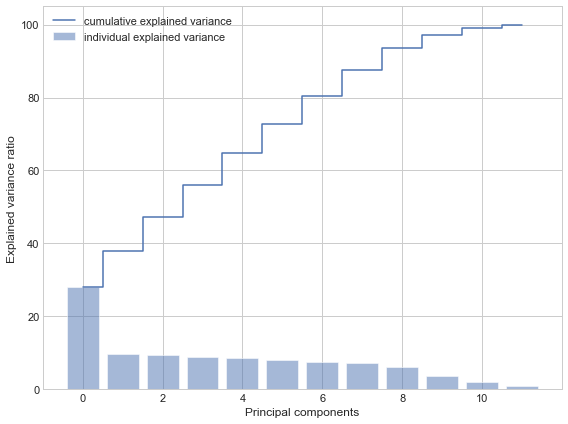

In [51]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(12), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(12), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('cumulative explained variance.png')

In [31]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(12,1), 
                      eig_pairs[1][1].reshape(12,1),
                      eig_pairs[2][1].reshape(12,1), 
                      eig_pairs[3][1].reshape(12,1),
                      eig_pairs[4][1].reshape(12,1), 
                      eig_pairs[5][1].reshape(12,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.50802295  0.06929089  0.1036003   0.03560667  0.00283867 -0.00992401]
 [ 0.28215414  0.15215314  0.48309971 -0.07186996  0.27521316  0.01468872]
 [ 0.47750175  0.0185006   0.12803494  0.09060978 -0.00836045  0.07053929]
 [ 0.45059469 -0.0081743  -0.20280242  0.0765251  -0.19135557 -0.04645932]
 [-0.17232762  0.05380392  0.62306681  0.30523538  0.13965757  0.33478261]
 [ 0.4335206  -0.12510134 -0.04848933  0.09856518 -0.03505547  0.00305015]
 [ 0.03445412 -0.51738808  0.10329514 -0.47328031 -0.02805054  0.03031944]
 [-0.08142982 -0.30829841  0.27518472  0.37438185 -0.61541362  0.14533801]
 [-0.05034317 -0.2151962   0.12143286  0.36538449  0.43521225 -0.687265  ]
 [ 0.03146737 -0.63383163 -0.0314648   0.18039075 -0.02463167 -0.11429882]
 [ 0.0476102  -0.37259979 -0.12316917 -0.08733686  0.51545157  0.53235253]
 [-0.00346989  0.0589323  -0.43645536  0.58205372  0.17777004  0.2993723 ]]


In [32]:
Y = spine_std.dot(matrix_w)
Y

array([[-0.04425257, -0.32091452, -1.49728495, -0.14896978,  0.49562708,
        -1.33324852],
       [-2.29445329, -0.8122956 , -0.36695326, -0.32228431,  0.45477254,
        -2.20000164],
       [ 0.25400389, -0.87257995,  0.40275898,  0.2722017 , -0.56634299,
        -2.23817119],
       ...,
       [-0.49928012,  1.25018319,  0.81864087, -0.23450675,  1.55384108,
         0.68920943],
       [-1.57632879,  0.41699589, -1.22712607,  0.60573615,  1.73457547,
         0.40559008],
       [-2.55906922, -1.5896145 , -1.02478168,  0.87933039,  1.52888235,
         0.26199876]])

Text(0, 0.5, 'Cumulative explained variance')

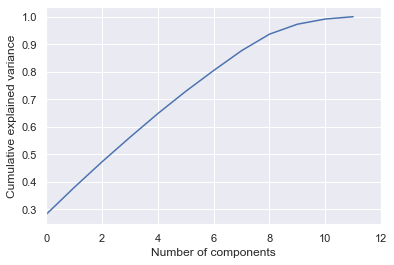

In [33]:
from sklearn.decomposition import PCA
pca = PCA().fit(spine_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [34]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(spine_std)
print(Y_sklearn)

[[-0.04425257  0.32091452 -1.49728495 -0.14896978 -0.49562708 -1.33324852]
 [-2.29445329  0.8122956  -0.36695326 -0.32228431 -0.45477254 -2.20000164]
 [ 0.25400389  0.87257995  0.40275898  0.2722017   0.56634299 -2.23817119]
 ...
 [-0.49928012 -1.25018319  0.81864087 -0.23450675 -1.55384108  0.68920943]
 [-1.57632879 -0.41699589 -1.22712607  0.60573615 -1.73457547  0.40559008]
 [-2.55906922  1.5896145  -1.02478168  0.87933039 -1.52888235  0.26199876]]


In [35]:
Y_sklearn=pd.DataFrame(Y_sklearn)

In [36]:
Y_sklearn.shape

(310, 6)

In [37]:
sample = Y_sklearn.values

In [38]:
ks = range(1,14)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(sample)
    inertias.append(model.inertia_)

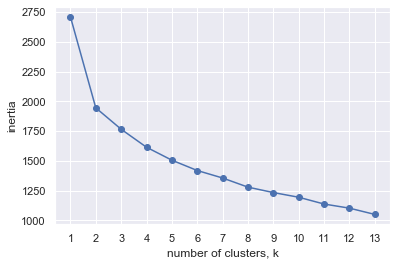

<Figure size 432x288 with 0 Axes>

In [52]:
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
plt.savefig('elbow curve.png')

In [40]:
model = KMeans(n_clusters=2)

In [41]:
labels = model.fit_predict(sample)

In [42]:
print(labels)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


In [43]:
frame = pd.DataFrame(sample)
frame['cluster'] = labels
frame['cluster'].value_counts()

0    168
1    142
Name: cluster, dtype: int64

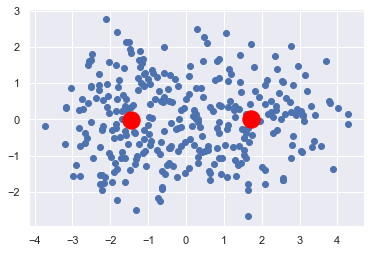

<Figure size 432x288 with 0 Axes>

In [53]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=310, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(sample)
plt.scatter(sample[:,0], sample[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
plt.savefig('centroid.png')

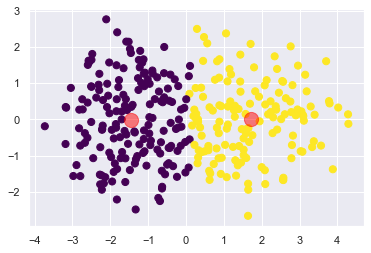

In [54]:
plt.scatter(sample[:, 0], sample[:, 1], c=pred_y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.savefig('cluster.png')

In [46]:
centroids = model.cluster_centers_
print(centroids)

[[-1.44329363 -0.00180999  0.04541618  0.03479647 -0.00711388  0.02342386]
 [ 1.70755866  0.0021414  -0.05373182 -0.04116766  0.00841642 -0.02771274]]


In [47]:
model.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,